<a href="https://colab.research.google.com/github/shubhamnawani99/aithon/blob/main/Level3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/shubhamnawani99/aithon.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
demo.ipynb	      LICENSE  README.md	 twitter_dump.txt
emotion_predictor.py  models   requirements.txt


In [ ]:
# requirements for the project
!pip install -r requirements.txt

In [30]:
# import the necessary libraries
import os;
os.environ['KERAS_BACKEND'] = 'theano'

import pandas as pd
import preprocessor as p
import json
import matplotlib.pyplot as plt
from emotion_predictor import EmotionPredictor

In [4]:
# Pandas presentation options
pd.options.display.max_colwidth = 150   # show whole tweet's content
pd.options.display.width = 200          # don't break columns
# pd.options.display.max_columns = 7      # maximal number of columns
p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.RESERVED, p.OPT.HASHTAG, p.OPT.MENTION)

In [5]:
# Predictor for Ekman's emotions in multiclass setting.
model = EmotionPredictor(classification='ekman', setting='mc', use_unison_model=False)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [6]:
# open the json file
path = "twitter_dump.txt"
with open(path) as json_file: 
    data = json.load(json_file) 

In [7]:
# cleaning the tweets, removing all the Mentions, URLs, Hashtags, Emojis and Reserved Words
tweets = []
for tweet in data:
    tweets.append(p.clean(tweet['text']))
print('The total number of tweets to classify are:',len(tweets))

The total number of tweets to classify are: 17598


In [8]:
# printing the first 10 tweets
i = 0
for tweet in tweets[:10]:
    i += 1
    print("{}. {}...".format(i, tweet[:100]))

1. Curve flattening? Kenya records 48 new virus cases, 176 recoveries via After we ATE CORONA MONEY, so...
2. Victoria and Melbourne Covid trend map: where coronavirus cases are rising or falling...
3. NSW and Sydney Covid trend map: where coronavirus cases are rising or falling...
4. ITS BAKE OFF DAY! Who else will be tuning in at 8pm? I recently read this really interesting article...
5. The Liberal party bots are out in force even though its not even a covid post. This is about trying ...
6. What dumba** named it the Corona Virus (COVID-19)...
7. Victoria and Melbourne Covid trend map: where coronavirus cases are rising or falling...
8. New cases September 21 2020: 19 countries with 2000 or more new cases Source:...
9. According to the CDC out of the 200,000 deaths only 6% are 100% COVID related. They get paid for rep...
10. When people dont want to follow the rules, dont expect any help when you get it....i cant believe pe...


In [23]:
# predicting the tweets
predictions = model.predict_classes(tweets)

In [20]:
# showing the emotion prediction for the input tweets
predictions.head()

,Tweet,Emotion
0,"Curve flattening? Kenya records 48 new virus cases, 176 recoveries via After we ATE CORONA MONEY, someone at the has been consulting with Darrel H...",Joy
1,Victoria and Melbourne Covid trend map: where coronavirus cases are rising or falling,Joy
2,NSW and Sydney Covid trend map: where coronavirus cases are rising or falling,Joy
3,ITS BAKE OFF DAY! Who else will be tuning in at 8pm? I recently read this really interesting article about how they were able to film this series ...,Surprise
4,The Liberal party bots are out in force even though its not even a covid post. This is about trying to get justice for child sexual abuse victims ...,Disgust


In [27]:
# counting the frequncy of emotions in the file
hist = {}
emotions = predictions.T.loc["Emotion"]
for emotion in emotions:
  hist[emotion] = hist.get(emotion, 0) + 1

In [28]:
# showing the frequency of emotions
print(hist)

{'Joy': 7301, 'Surprise': 4184, 'Disgust': 595, 'Anger': 831, 'Fear': 2703, 'Sadness': 1984}


<BarContainer object of 6 artists>

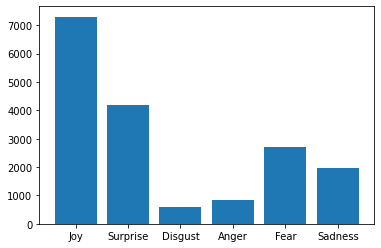

In [37]:
# plotting the frequecy of emotions
plt.bar(hist.keys(), hist.values())